INSURANCE CLAIM FRAUD DETECTION PROJECT

Since, this is a classification project, we import necessary libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

Import Dataset from GitHub

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

First, let's seperate the date columns

In [6]:
df['Policy_Bind_Day'] = [i.split('-')[0] for i in df['policy_bind_date']]
df['Policy_Bind_Month'] = [i.split('-')[1] for i in df['policy_bind_date']]
df['Policy_Bind_Year'] = [i.split('-')[2] for i in df['policy_bind_date']]
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,NaN,27,06,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,NaN,06,09,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,05,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,NaN,06,06,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,8720,61040,Honda,Accord,2006,N,NaN,16,07,1991
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,18080,72320,Volkswagen,Passat,2015,N,NaN,05,01,2014
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,7500,52500,Suburu,Impreza,1996,N,NaN,17,02,2003
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,5220,36540,Audi,A5,1998,N,NaN,18,11,2011


In [7]:
df['Incident_Day'] = [i.split('-')[0] for i in df['incident_date']]
df['Incident_Month'] = [i.split('-')[1] for i in df['incident_date']]
df['Incident_Year'] = [i.split('-')[2] for i in df['incident_date']]
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,_c39,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,NaN,17,10,2014,25,01,2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,NaN,27,06,2006,21,01,2015
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,RAM,2007,N,NaN,06,09,2000,22,02,2015
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,Tahoe,2014,Y,NaN,25,05,1990,10,01,2015
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,RSX,2009,N,NaN,06,06,2014,17,02,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,Accord,2006,N,NaN,16,07,1991,22,02,2015
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,Passat,2015,N,NaN,05,01,2014,24,01,2015
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,Impreza,1996,N,NaN,17,02,2003,23,01,2015
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,A5,1998,N,NaN,18,11,2011,26,02,2015


We also need to seperate policy_csl column

In [8]:
df['Policy_csl_lower'] = [i.split('/')[0] for i in df['policy_csl']]
df['Policy_csl_upper'] = [i.split('/')[1] for i in df['policy_csl']]

In [9]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,_c39,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,Y,NaN,17,10,2014,25,01,2015,250,500
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,Y,NaN,27,06,2006,21,01,2015,250,500
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,N,NaN,06,09,2000,22,02,2015,100,300
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,Y,NaN,25,05,1990,10,01,2015,250,500
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,N,NaN,06,06,2014,17,02,2015,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,N,NaN,16,07,1991,22,02,2015,500,1000
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,N,NaN,05,01,2014,24,01,2015,100,300
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,N,NaN,17,02,2003,23,01,2015,250,500
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,N,NaN,18,11,2011,26,02,2015,500,1000


Now before treating the dataset, let's drop all the useless columns:

In [10]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [11]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [12]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [13]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [14]:
drop_columns = ['policy_number','policy_bind_date','policy_csl','insured_zip','incident_date','incident_location','auto_model','_c39']

In [15]:
df = df.drop(columns = drop_columns,axis = 1)
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,2004,Y,17,10,2014,25,01,2015,250,500
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,2007,Y,27,06,2006,21,01,2015,250,500
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2007,N,06,09,2000,22,02,2015,100,300
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,2014,Y,25,05,1990,10,01,2015,250,500
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,2009,N,06,06,2014,17,02,2015,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,2006,N,16,07,1991,22,02,2015,500,1000
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,2015,N,05,01,2014,24,01,2015,100,300
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,1996,N,17,02,2003,23,01,2015,250,500
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,1998,N,18,11,2011,26,02,2015,500,1000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [17]:
df['Policy_Bind_Day'] = df['Policy_Bind_Day'].astype(float)
df['Policy_Bind_Month'] = df['Policy_Bind_Month'].astype(float)
df['Policy_Bind_Year'] = df['Policy_Bind_Year'].astype(float)
df['Incident_Day'] = df['Incident_Day'].astype(float)
df['Incident_Month'] = df['Incident_Month'].astype(float)
df['Incident_Year'] = df['Incident_Year'].astype(float)
df['Policy_csl_lower'] = df['Policy_csl_lower'].astype(float)
df['Policy_csl_upper'] = df['Policy_csl_upper'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [18]:
df = df.drop_duplicates()
df.shape

(1000, 40)

Converting our Target column to Binary float: 

In [19]:
fraud = []
for i in df['fraud_reported']:
    if i == 'Y':
        fraud.append(1)
    else:
        fraud.append(0)
        
df['fraud_reported']=fraud
df.head(10)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,2004,1,17.0,10.0,2014.0,25.0,1.0,2015.0,250.0,500.0
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,2007,1,27.0,6.0,2006.0,21.0,1.0,2015.0,250.0,500.0
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2007,0,6.0,9.0,2000.0,22.0,2.0,2015.0,100.0,300.0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,2014,1,25.0,5.0,1990.0,10.0,1.0,2015.0,250.0,500.0
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,2009,0,6.0,6.0,2014.0,17.0,2.0,2015.0,500.0,1000.0
5,256,39,OH,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,...,2003,1,12.0,10.0,2006.0,2.0,1.0,2015.0,250.0,500.0
6,137,34,IN,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,...,2012,0,4.0,6.0,2000.0,13.0,1.0,2015.0,250.0,500.0
7,165,37,IL,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,...,2015,0,3.0,2.0,1990.0,27.0,2.0,2015.0,100.0,300.0
8,27,33,IL,500,1442.99,0,FEMALE,PhD,other-service,golf,...,2012,0,5.0,2.0,1997.0,30.0,1.0,2015.0,100.0,300.0
9,212,42,IL,500,1315.68,0,MALE,PhD,priv-house-serv,camping,...,1996,0,25.0,7.0,2011.0,5.0,1.0,2015.0,100.0,300.0


Changing categorical columns to Integers

In [20]:
categorical_columns = ['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make']

In [21]:
for i in categorical_columns:
    print(df[i].unique())

['OH' 'IN' 'IL']
['MALE' 'FEMALE']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' '?' 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['Police' 'None' 'Fire' 'Other' 'Ambulance']
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lab = LabelEncoder()

In [24]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
0,328,48,2,1000,1406.91,0,1,4,2,17,...,2004,1,17.0,10.0,2014.0,25.0,1.0,2015.0,250.0,500.0
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,2007,1,27.0,6.0,2006.0,21.0,1.0,2015.0,250.0,500.0
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,2007,0,6.0,9.0,2000.0,22.0,2.0,2015.0,100.0,300.0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,2014,1,25.0,5.0,1990.0,10.0,1.0,2015.0,250.0,500.0
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,2009,0,6.0,6.0,2014.0,17.0,2.0,2015.0,500.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,2006,0,16.0,7.0,1991.0,22.0,2.0,2015.0,500.0,1000.0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,2015,0,5.0,1.0,2014.0,24.0,1.0,2015.0,100.0,300.0
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,1996,0,17.0,2.0,2003.0,23.0,1.0,2015.0,250.0,500.0
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,1998,0,18.0,11.0,2011.0,26.0,2.0,2015.0,500.0,1000.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [26]:
df.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,9.731000,...,2005.103000,0.247000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0,272.650000,580.200000
std,115.113174,9.140287,0.83096,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,5.674049,...,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697,0.0,161.603196,287.420547
min,0.000000,19.000000,0.00000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0,100.000000,300.000000
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,5.000000,...,2000.000000,0.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0,100.000000,300.000000
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,...,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0,250.000000,500.000000
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,...,2010.000000,0.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0,500.000000,1000.000000
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,...,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0,500.000000,1000.000000


Now that we have cleaned our dataset, we are ready to now begin visualizing it

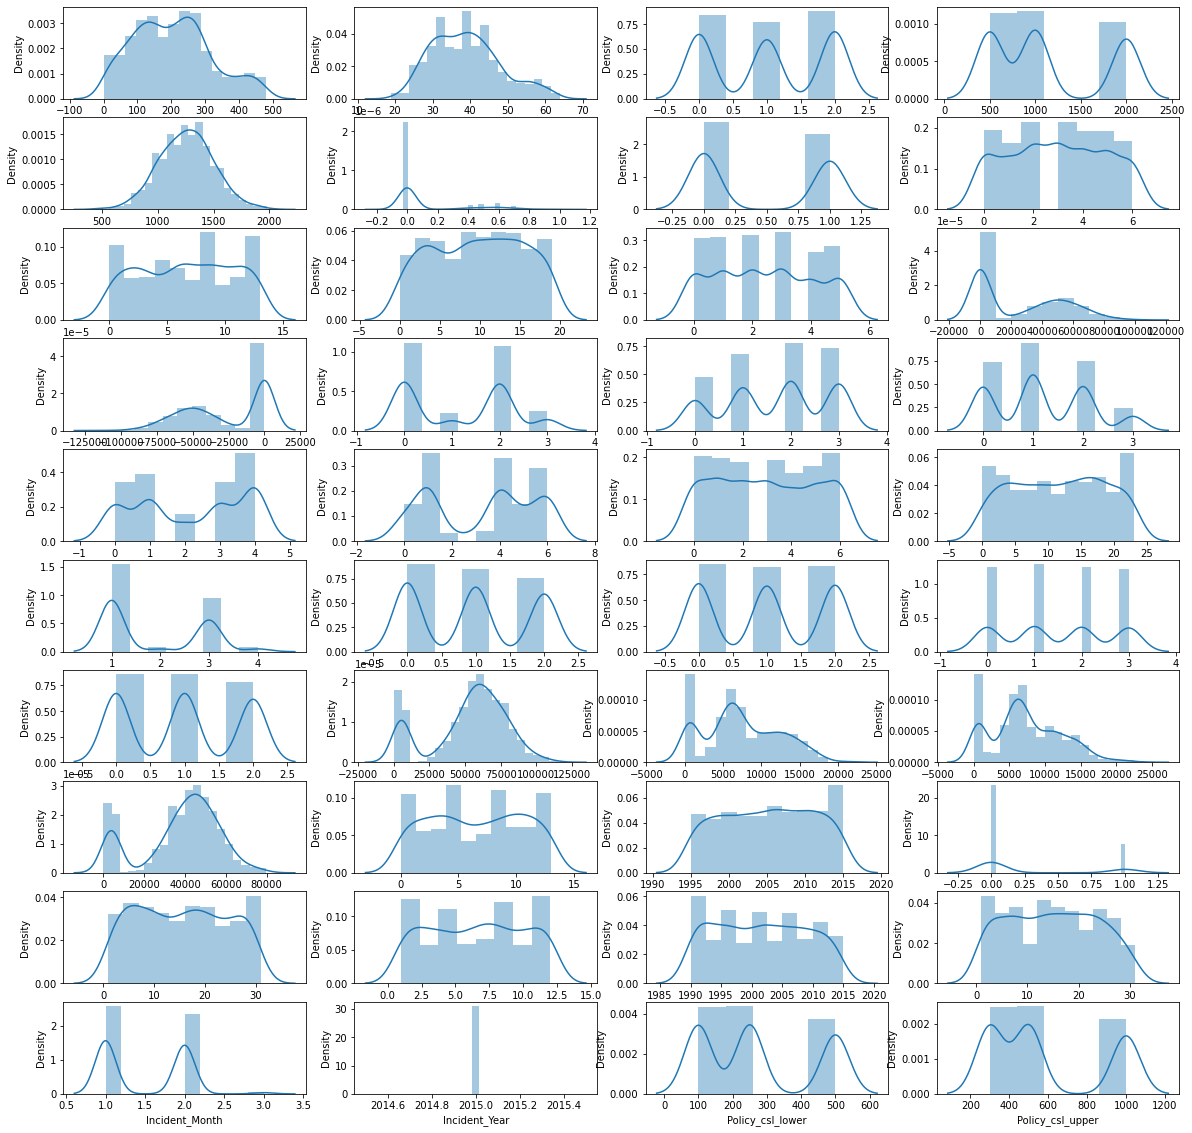

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

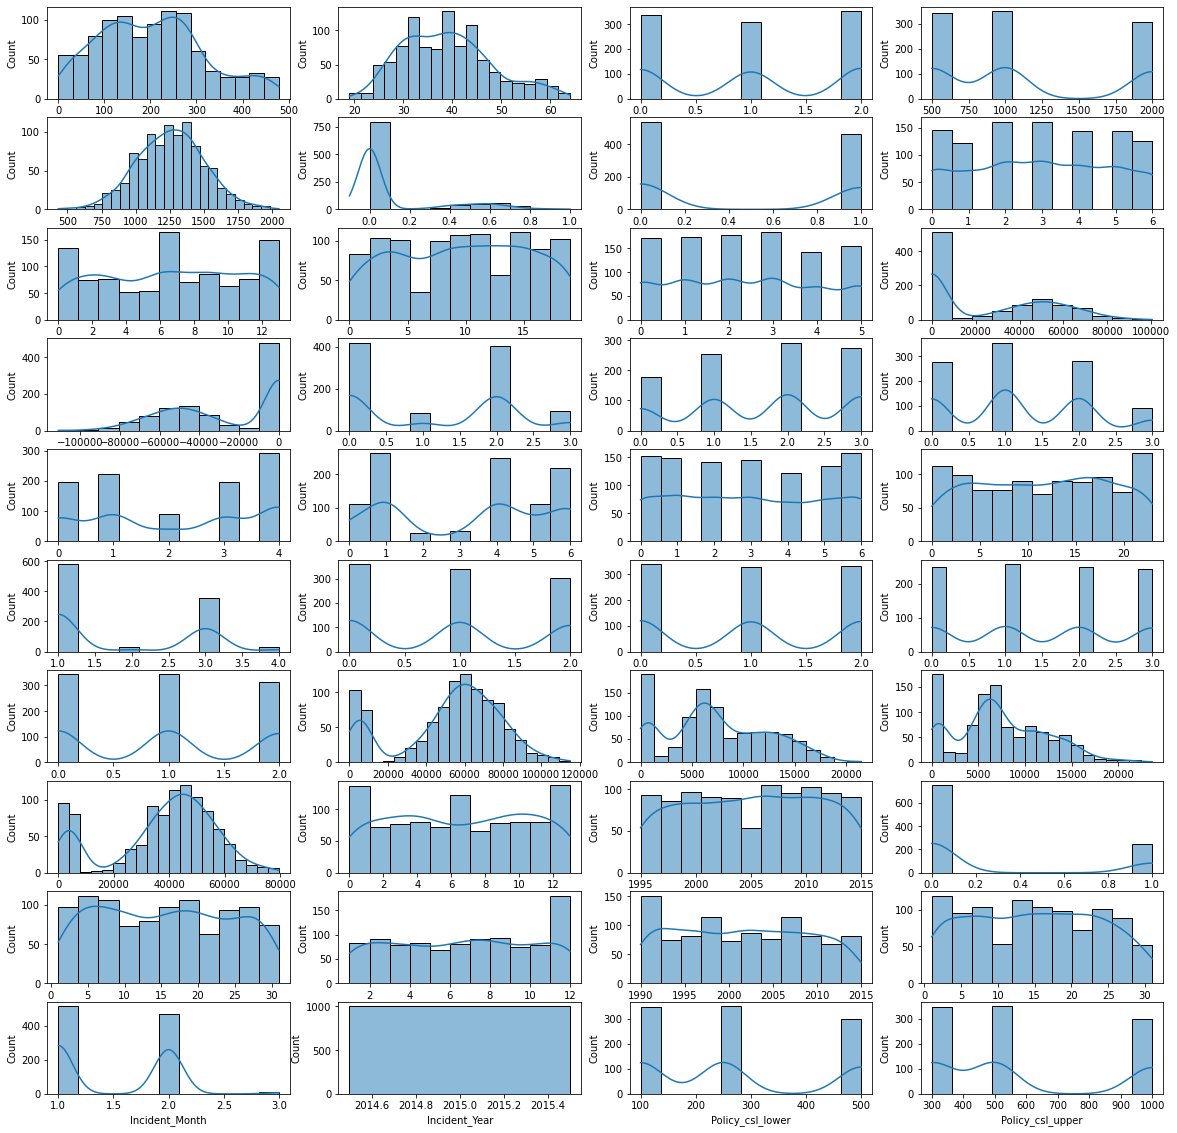

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

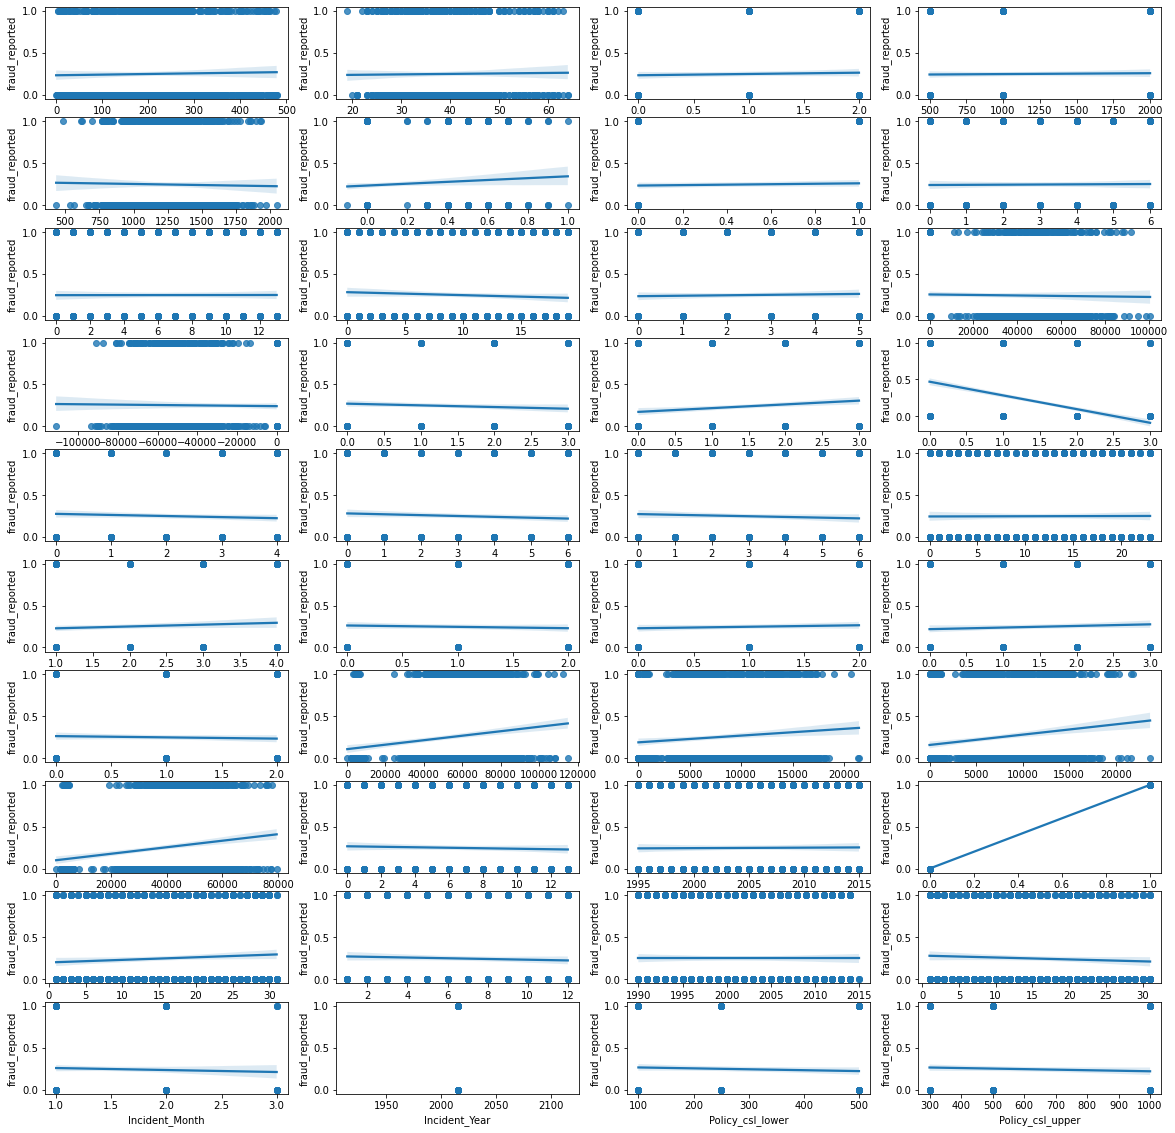

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.regplot(x=column,y='fraud_reported',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

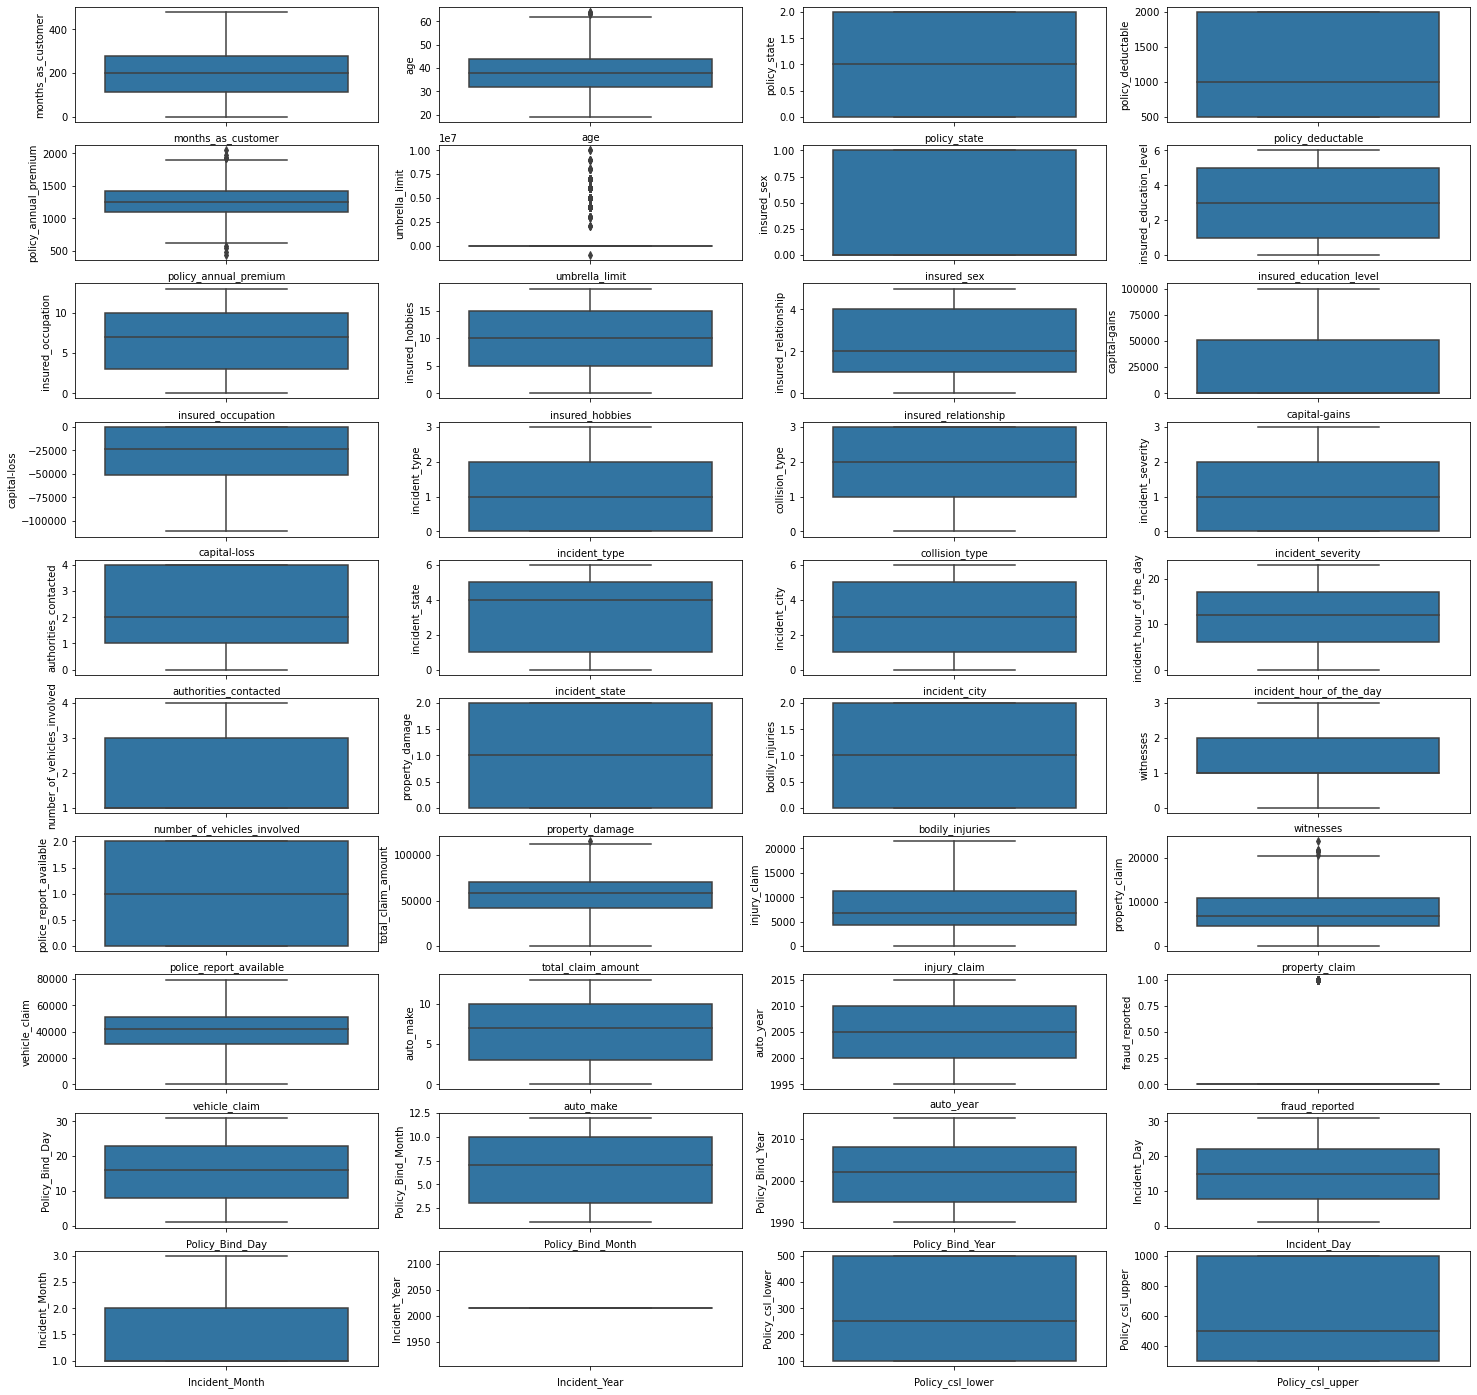

In [32]:
plt.figure(figsize=(25,25))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Let's check the heatmap for any multi-collinearity problems

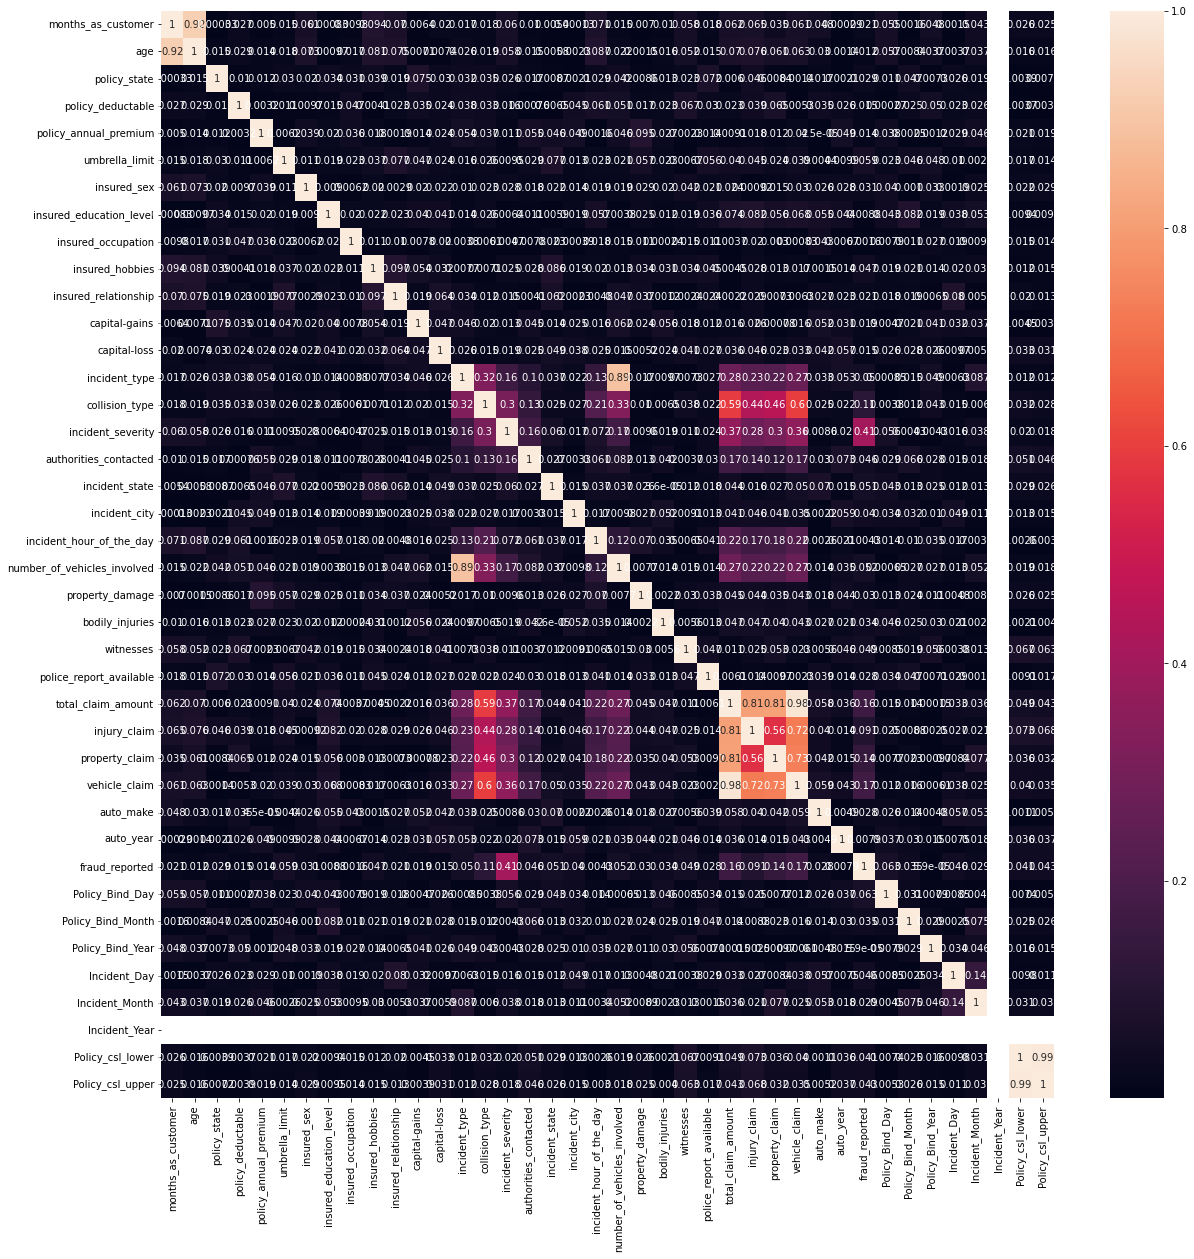

In [33]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

We can see, Total Claim amount and Vehicle Claim are very highly correlated, Let's confirm this using scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

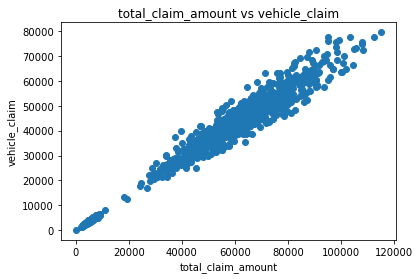

In [34]:
plt.scatter(df['total_claim_amount'], df['vehicle_claim'])
plt.xlabel('total_claim_amount')
plt.ylabel('vehicle_claim')
plt.title('total_claim_amount vs vehicle_claim')
plt.show

They are obviosly very highly correlated, therefore i will be dropping the total claim column

In [35]:
df = df.drop(columns = ['total_claim_amount'], axis=1)
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
0,328,48,2,1000,1406.91,0,1,4,2,17,...,2004,1,17.0,10.0,2014.0,25.0,1.0,2015.0,250.0,500.0
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,2007,1,27.0,6.0,2006.0,21.0,1.0,2015.0,250.0,500.0
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,2007,0,6.0,9.0,2000.0,22.0,2.0,2015.0,100.0,300.0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,2014,1,25.0,5.0,1990.0,10.0,1.0,2015.0,250.0,500.0
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,2009,0,6.0,6.0,2014.0,17.0,2.0,2015.0,500.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,2006,0,16.0,7.0,1991.0,22.0,2.0,2015.0,500.0,1000.0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,2015,0,5.0,1.0,2014.0,24.0,1.0,2015.0,100.0,300.0
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,1996,0,17.0,2.0,2003.0,23.0,1.0,2015.0,250.0,500.0
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,1998,0,18.0,11.0,2011.0,26.0,2.0,2015.0,500.0,1000.0


In [36]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967


Let's seperate our dataset into featires and target columns

In [37]:
x = df.drop(columns = ['fraud_reported'])
y = df.fraud_reported

In [38]:
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_year,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Policy_csl_lower,Policy_csl_upper
0,328,48,2,1000,1406.91,0,1,4,2,17,...,10,2004,17.0,10.0,2014.0,25.0,1.0,2015.0,250.0,500.0
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,8,2007,27.0,6.0,2006.0,21.0,1.0,2015.0,250.0,500.0
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,4,2007,6.0,9.0,2000.0,22.0,2.0,2015.0,100.0,300.0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,3,2014,25.0,5.0,1990.0,10.0,1.0,2015.0,250.0,500.0
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,2009,6.0,6.0,2014.0,17.0,2.0,2015.0,500.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,6,2006,16.0,7.0,1991.0,22.0,2.0,2015.0,500.0,1000.0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,13,2015,5.0,1.0,2014.0,24.0,1.0,2015.0,100.0,300.0
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,11,1996,17.0,2.0,2003.0,23.0,1.0,2015.0,250.0,500.0
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,1,1998,18.0,11.0,2011.0,26.0,2.0,2015.0,500.0,1000.0


In [39]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

Use Power Transformer to reduce skewness

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
x_scaled = scaler.fit_transform(x.values)
x_scaled

array([[ 1.05127872,  1.00873272,  1.14604754, ...,  0.        ,
         0.13694331,  0.04840245],
       [ 0.30453584,  0.43143333,  0.0718058 , ...,  0.        ,
         0.13694331,  0.04840245],
       [-0.51122603, -1.13951302,  1.14604754, ...,  0.        ,
        -1.21908026, -1.17631639],
       ...,
       [-0.54970642, -0.47044379,  1.14604754, ...,  0.        ,
         0.13694331,  0.04840245],
       [ 1.9126537 ,  2.13055434, -1.25937435, ...,  0.        ,
         1.25797304,  1.3118172 ],
       [ 1.90009963,  1.98572613,  1.14604754, ...,  0.        ,
         0.13694331,  0.04840245]])

Now, we use PCA to perform dimension reduction for our model

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()

In [47]:
pca.fit_transform(x_scaled)

array([[-9.54587445e-01,  2.76782396e-01, -1.31362279e+00, ...,
         9.39600602e-02,  4.61379889e-02, -2.41479536e-17],
       [ 3.57794134e+00,  4.40424180e-01, -7.33993896e-01, ...,
        -4.01878323e-01,  5.82797354e-02,  7.19022437e-17],
       [-1.69528203e-01,  9.08309262e-01,  1.59552849e+00, ...,
        -8.17726871e-02, -3.36338592e-02, -1.34250091e-16],
       ...,
       [-1.26411792e+00, -8.25593286e-01,  5.75842795e-01, ...,
        -2.01482088e-02,  6.18890629e-02,  1.82184967e-17],
       [ 7.20232463e-01, -4.45836776e-01, -3.47292908e+00, ...,
        -2.54523917e-03, -4.55255041e-02, -2.31167076e-18],
       [ 3.27321687e+00,  8.03948512e-01, -2.28271755e+00, ...,
         4.54610363e-01,  5.28852346e-02,  3.30406181e-17]])

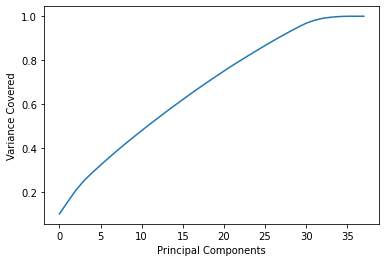

In [48]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 33 components to cover about 95% of variance

In [49]:
pca = PCA (n_components = 33)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,-0.954587,0.276782,-1.313623,1.545018,-2.811304,0.097424,0.207211,1.034012,0.442781,0.158048,...,-0.674394,-0.459063,0.274675,-1.045747,-0.978803,1.879463,-0.099376,-0.421964,-0.677146,-0.540037
1,3.577941,0.440424,-0.733994,-0.197906,-0.486463,-1.191472,0.159128,-1.433921,0.995800,-0.393732,...,-0.763252,0.498620,-0.236789,0.878799,0.401521,1.803935,-1.204151,0.000240,0.308349,-0.012218
2,-0.169528,0.908309,1.595528,-1.854199,0.612983,-0.675122,0.154131,1.871775,-0.650072,0.594976,...,-0.616507,-1.070245,-0.594170,-0.140286,0.624141,0.037005,-0.635888,1.208437,-0.257211,0.745362
3,0.416181,0.076321,-1.285590,0.587545,0.941570,-3.179297,-0.564749,0.165906,1.662715,-0.633253,...,0.084726,-1.423542,1.177300,-1.120389,-0.396702,-0.265999,1.490351,1.291903,0.134495,0.002422
4,3.295186,-1.033812,-1.503815,-0.354592,1.808842,1.209682,-0.202850,0.821147,-0.732043,1.226076,...,-1.417788,0.419594,1.900079,-1.128672,0.232810,-0.309416,-0.390572,0.940780,0.512556,0.047976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.737980,-1.666720,0.882617,2.447232,1.039804,0.929565,0.398118,0.012514,1.422523,-0.446317,...,0.847617,-1.216282,-1.336470,-0.368528,1.972764,-0.578079,-0.456582,-0.302499,1.439590,0.788083
996,-2.908266,1.747896,-0.389332,1.990639,-1.798731,-2.389583,-0.136579,-0.105478,-1.403847,-0.189469,...,-0.575346,-0.666121,0.425345,-0.625316,1.232854,-0.370137,-1.156131,0.298465,0.711664,-0.100563
997,-1.264118,-0.825593,0.575843,-0.920922,-0.756702,-1.939892,1.704533,1.934642,-0.218337,2.151052,...,-0.138339,-0.712151,-0.895073,-0.471366,0.168549,-0.059217,2.234948,0.135251,-0.440273,0.246871
998,0.720232,-0.445837,-3.472929,0.322948,2.731758,0.774948,1.392846,0.890670,1.139211,1.741526,...,-0.020004,0.268362,1.938022,-1.489331,0.101339,1.977370,-1.021980,-0.070902,-0.401267,0.003677


In [50]:
princi_comp.skew()

PC1     0.882237
PC2    -0.027190
PC3    -0.064230
PC4     0.204633
PC5     0.034976
PC6     0.223141
PC7     0.215934
PC8     0.008907
PC9     0.084156
PC10   -0.009357
PC11   -0.050119
PC12    0.017837
PC13    0.019714
PC14    0.039509
PC15    0.021680
PC16    0.062956
PC17   -0.062192
PC18    0.058962
PC19    0.870982
PC20    0.009761
PC21    0.866335
PC22    0.018115
PC23    0.068806
PC24   -0.018448
PC25    0.067724
PC26    0.052518
PC27    0.128255
PC28    0.073427
PC29    0.046961
PC30    0.098686
PC31    0.204317
PC32   -0.044279
PC33   -0.141339
dtype: float64

Now, for accurate predictions, we need to balance our target variable

Check balance using Counter

In [51]:
from collections import Counter
Counter(y)

Counter({1: 247, 0: 753})

We can see our target variable is highly imbalanced and we need to balance it

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
x_train1,x_test,y_train1,y_test = train_test_split(princi_comp,y,test_size=0.2,random_state=42)

In [54]:
Counter(y_train1)

Counter({0: 608, 1: 192})

In [55]:
sm = SMOTE(sampling_strategy=0.85)

In [56]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 608, 1: 192}) 
Classes after fitCounter({0: 608, 1: 516}) 


Now that we have balanced our target variable, we can begin Model Training and Testing

In [57]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False: 
        pred= clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [59]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 78.11%

 ======TESTING RESULT======
Accuracy Score: 70.50%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       145
           1       0.47      0.64      0.54        55

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.74      0.70      0.72       200



In [60]:
pred = lr.predict(x_test)

Confusion Matrix

In [61]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[106,  39],
       [ 20,  35]], dtype=int64)

We can note that we are getting training accuracy of 78.11% and Testing accuracy of 70.50% with Logistic Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [62]:
from sklearn.svm import SVC

In [63]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [64]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Training Accuracies for other models:

In [65]:
print(lr.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(dec.score(x_train,y_train))
print(ran.score(x_train,y_train))
print(svc.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.7811387900355872
0.7695729537366548
1.0
1.0
0.9635231316725978
1.0


Check Testing Accuracies for other models:

In [66]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(svc.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.705
0.53
0.66
0.705
0.73
0.715


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

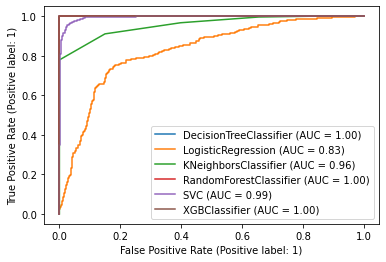

In [67]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

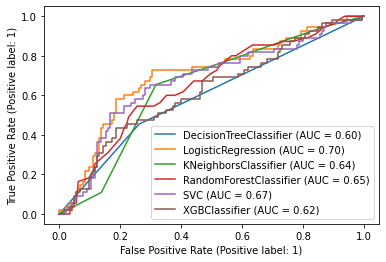

In [68]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

We can note SVC is the model with highest accuracy model for both Training and Testing, BUT, it is not as consistent as Logistic Regression Model. Therefore our best performing model is still the Logistic Regression Model

Now, we perform some hyperparameter tuning on our Log Reg Model

In [69]:
params = {'solver':['lbfgs','saga'],
         'penalty':['none','l2'],
         'C':[0.1,1,10],
        }

In [70]:
grid = GridSearchCV(lr, param_grid = params, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'saga']})

In [71]:
print('best parameters: ',grid.best_params_)

best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [72]:
lr_grid = grid.best_estimator_
lr_grid.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [73]:
metric_score(lr_grid,x_train,x_test,y_train,y_test,train = True)
metric_score(lr_grid,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 78.29%

 ======TESTING RESULT======
Accuracy Score: 72.00%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       145
           1       0.49      0.65      0.56        55

    accuracy                           0.72       200
   macro avg       0.67      0.70      0.68       200
weighted avg       0.75      0.72      0.73       200



We can note increase in both Training and Testing Accuracy with HyperParameter Tuning

Again, Checking the confusion matrix

In [74]:
pred_hypertuned = lr_grid.predict(x_test)
conf_matrix_hypertuned = confusion_matrix(y_test,pred_hypertuned)
conf_matrix_hypertuned

array([[108,  37],
       [ 19,  36]], dtype=int64)

Thus, we can conclude, Hypertuned Logistic Regression is the best model for us currently and we can save this model for predictions.